### **Import des librairies**

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

### **Lecture du fichier**

In [4]:
df = pd.read_csv("E:/pandas/ventes_data.csv", sep=";")

### **Conversion de la colonne date en datetime**

In [6]:
df["date"] = pd.to_datetime(df["date"], dayfirst= True)

### **Comprendre le dataset**

In [8]:
df.head()

,date,produit,categorie,region,client,quantité,prix_unitaire,ca
0,2023-06-13,T-shirt,Vêtements,Ouest,Charlie,6,70.24,421.44
1,2023-01-29,TV,Vêtements,Sud,Emma,10,182.33,1823.30
2,2023-01-07,Ballon,Électronique,Ouest,Bob,1,395.27,395.27
3,2023-03-12,Chaise,Vêtements,Sud,David,2,296.48,592.96
4,2023-03-04,Chaise,Alimentation,Nord,Alice,11,12.81,140.91


In [9]:
df.tail()

,date,produit,categorie,region,client,quantité,prix_unitaire,ca
195,2023-05-17,Chaise,Alimentation,Est,Alice,18,342.16,6158.88
196,2023-02-02,Chaise,Sports,Est,David,9,441.61,3974.49
197,2023-02-02,Montre,Sports,Ouest,Alice,6,323.28,1939.68
198,2023-06-18,Pain,Électronique,Nord,Alice,4,493.33,1973.32
199,2023-05-02,TV,Électronique,Sud,David,1,164.99,164.99


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           200 non-null    datetime64[ns]
 1   produit        200 non-null    object        
 2   categorie      200 non-null    object        
 3   region         200 non-null    object        
 4   client         200 non-null    object        
 5   quantité       200 non-null    int64         
 6   prix_unitaire  200 non-null    float64       
 7   ca             200 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 12.6+ KB


In [11]:
df.describe()

,quantité,prix_unitaire,ca
count,200.000000,200.000000,200.000000
mean,10.250000,239.115250,2447.723950
std,5.630811,134.647624,2029.033223
min,1.000000,12.810000,42.810000
25%,5.000000,131.567500,788.855000
50%,10.000000,222.755000,1984.860000
75%,15.000000,339.512500,3417.425000
max,20.000000,499.300000,9517.800000


In [12]:
quant_total = df['quantité'].sum()
print(quant_total)

2050


### **Axe 1: Analyse temporelle**

In [14]:
annee_mois = df['date'].dt.to_period('M')

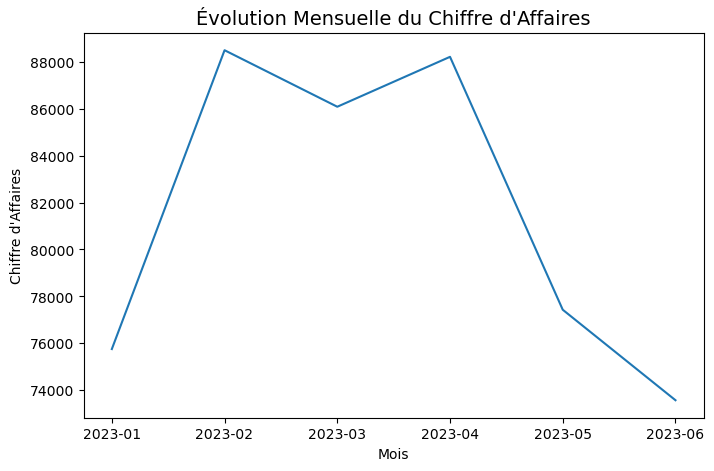

In [15]:
ca_mensuel = df.groupby(annee_mois)['ca'].sum()
plt.figure(figsize = (8,5))
plt.plot(ca_mensuel.index.astype(str), ca_mensuel.values)
plt.title("Évolution Mensuelle du Chiffre d'Affaires", fontsize=14)
plt.xlabel("Mois")
plt.ylabel("Chiffre d'Affaires")
plt.show()

### **Axe 2: Analyse produit**

In [19]:
ca_produit = df.groupby('produit')['ca'].sum().sort_values(ascending = False)

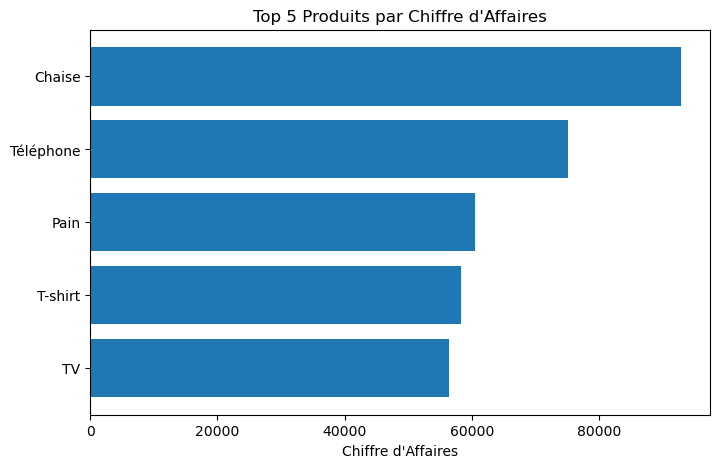

In [28]:
top5 = ca_produit.head(5)
plt.figure(figsize=(8,5))
plt.barh(top5.index, top5.values)
plt.title("Top 5 Produits par Chiffre d'Affaires")
plt.xlabel("Chiffre d'Affaires")
plt.gca().invert_yaxis()
plt.show()

**Répartition du chiffre d'Affaires par produit** 

In [33]:
ca_total = df['ca'].sum()

In [35]:
contribution_produit = (ca_produit / ca_total) * 100

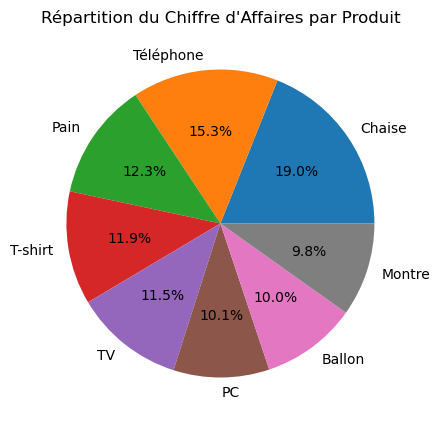

In [37]:
plt.figure(figsize=(7,5))
plt.pie(contribution_produit.values, labels=contribution_produit.index, autopct='%1.1f%%')
plt.title("Répartition du Chiffre d'Affaires par Produit")
plt.show()

**Analyse Pareto**

In [40]:
contribution_cumulee = contribution_produit.cumsum()

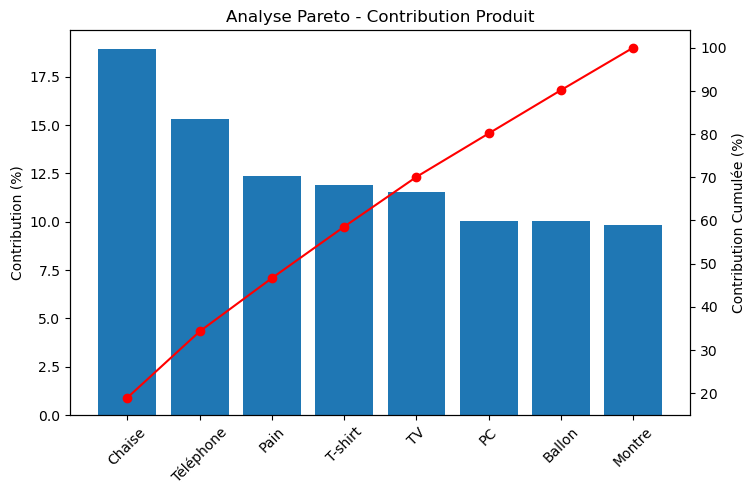

In [42]:
fig, ax1 = plt.subplots(figsize=(8,5))

# Barres
ax1.bar(contribution_produit.index, contribution_produit.values)
ax1.set_ylabel("Contribution (%)")
ax1.set_title("Analyse Pareto - Contribution Produit")
ax1.tick_params(axis='x', rotation=45)

# Ligne cumulée
ax2 = ax1.twinx()
ax2.plot(contribution_produit.index, contribution_cumulee.values, marker='o', color = "red")
ax2.set_ylabel("Contribution Cumulée (%)")
plt.show()


### **Axe 3: Analyse client**

In [45]:
ca_client = df.groupby('client')['ca'].sum().sort_values(ascending = False)

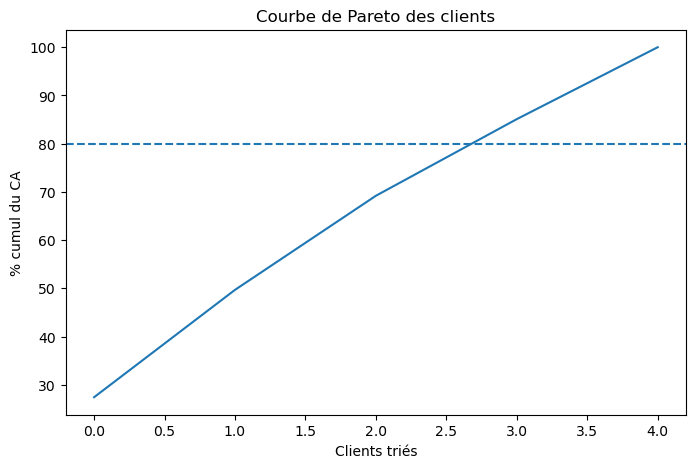

In [47]:
cum_pct = ca_client.cumsum() / ca_client.sum() * 100

plt.figure(figsize=(8,5))
plt.plot(cum_pct.values)
plt.axhline(80, linestyle="--")
plt.title("Courbe de Pareto des clients")
plt.ylabel("% cumul du CA")
plt.xlabel("Clients triés")
plt.show()

**Fréquence des clients** 

In [50]:
clients_stats = df.groupby('client').agg({
    "ca":"sum",
    "date" : "count"
}).rename(columns={"ca":"montant", "date" :"frequence" })

clients_stats.head(10)

,montant,frequence
client,,
Alice,72974.41,38
Bob,77797.24,30
Charlie,95512.11,39
David,134287.76,53
Emma,108973.27,40


### **Axe 4: Analyse geographique**

In [53]:
ca_region = df.groupby('region')['ca'].sum().sort_values(ascending = False)

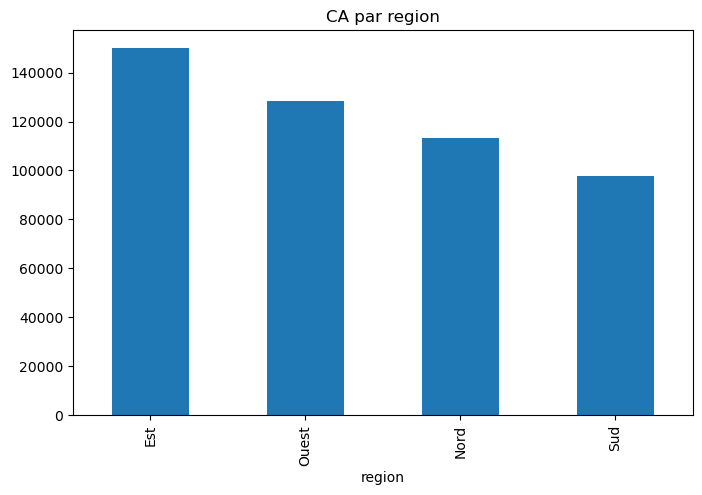

In [55]:
ca_region.plot(kind ="bar", figsize =(8,5), title="CA par region")
ylabel = "Chiffres d'affaires"
xlabel = "Region"
plt.show()